In [77]:
#import libraries
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [78]:
#constants
SHAPE = (200, 200)
PATH = r"D:\Mask Detection\Mask-Detection\data"
PATH_LABTOP = r"C:\Users\wyman\OneDrive\Desktop\Mask Detection\data"

In [79]:
mask_imgs = []
no_mask_imgs = []
fp_m = []
fp_nm = []


#iterate through directory assigning images to array categories
for dir in os.listdir(PATH_LABTOP):
    if dir == 'without_mask':
        for filename in os.listdir(PATH_LABTOP + '\\' + str(dir)):
            img = os.path.join(PATH_LABTOP + '\\' + str(dir), filename)
            img = load_img(img, target_size = SHAPE, grayscale = True) 
            img = img_to_array(img)
            no_mask_imgs.append(img)
    else:
        for filename in os.listdir(PATH_LABTOP + '\\' + str(dir)):
            img = os.path.join(PATH_LABTOP + '\\' + str(dir), filename)
            img = load_img(img, target_size = SHAPE, grayscale = True)
            img = img_to_array(img)
            mask_imgs.append(img)         

C:\Users\wyman\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [80]:
#standardization converting to numpy array & 0-1 scale
mask_imgs = np.asarray(mask_imgs) / 255.0
no_mask_imgs = np.asarray(no_mask_imgs) / 255.0

In [81]:
mask_imgs.shape

(690, 200, 200, 1)

In [82]:
#if you want to put pixels into df
df_nm = pd.DataFrame(no_mask_imgs.reshape(no_mask_imgs.shape[0], 200*200))
df = pd.DataFrame(mask_imgs.reshape(mask_imgs.shape[0], 200*200))

In [83]:
#assign column names
leng = df.shape[1]
df.columns = ['pixel ' + str(i) for i in range(leng)]
df_nm.columns = ['pixel ' + str(i) for i in range(leng)]
df['label'] = 'mask'
df_nm['label'] = 'no_mask'

In [84]:
#concat both dataframes and shuffle 
df = pd.concat([df, df_nm], axis = 0)

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['label'], test_size = 0.1, random_state = 42)

In [106]:
dfs = [X_train, X_test]
for df in dfs:
    df.drop('label', axis = 1, inplace = True)

C:\Users\wyman\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


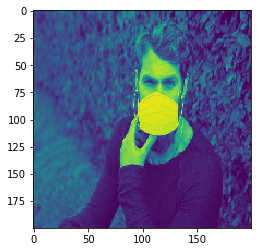

In [108]:
#sample img
img = plt.imshow(mask_imgs[0][:, :, 0])

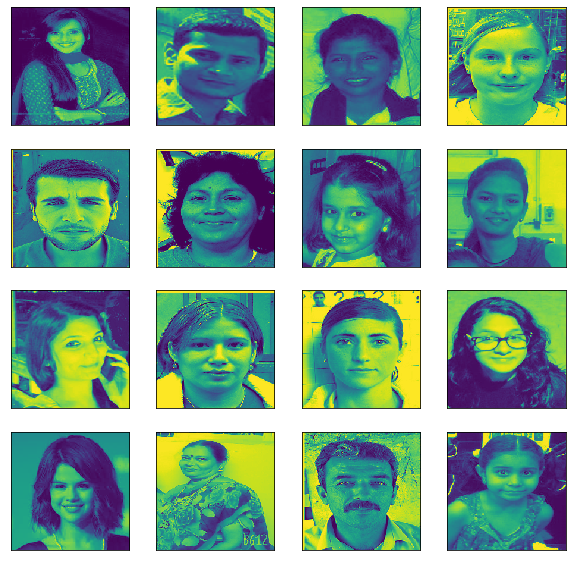

In [109]:
#sample imgs no masks
plt.figure(figsize = (10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(no_mask_imgs[i][:,:,0])
plt.show()

In [110]:
no_mask_imgs.shape

(686, 200, 200, 1)

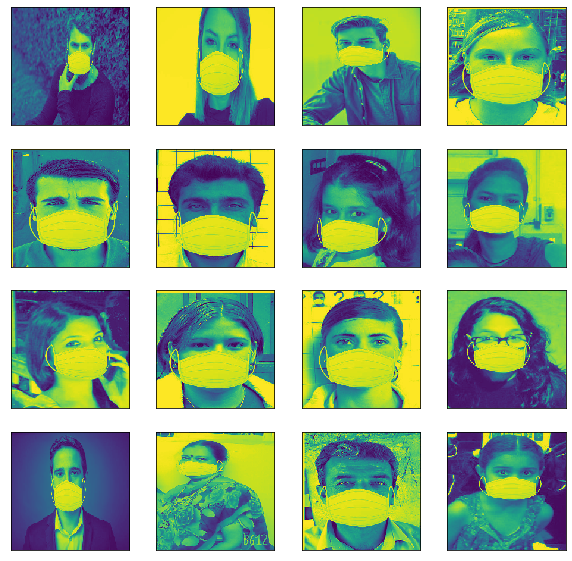

In [111]:
#sample imgs masks
plt.figure(figsize = (10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mask_imgs[i][:,:,0])
plt.show()

In [112]:
no_mask_imgs.shape

(686, 200, 200, 1)

In [113]:
X_train.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 39990,pixel 39991,pixel 39992,pixel 39993,pixel 39994,pixel 39995,pixel 39996,pixel 39997,pixel 39998,pixel 39999
58,0.827451,0.827451,0.827451,0.831373,0.831373,0.835294,0.835294,0.835294,0.835294,0.835294,...,0.215686,0.203922,0.172549,0.176471,0.133333,0.145098,0.200000,0.196078,0.266667,0.388235
254,0.792157,0.803922,0.815686,0.819608,0.815686,0.815686,0.815686,0.819608,0.823529,0.823529,...,0.294118,0.266667,0.250980,0.258824,0.262745,0.270588,0.278431,0.278431,0.270588,0.262745
614,0.643137,0.576471,0.713726,0.827451,0.713726,0.843137,0.870588,0.619608,0.631373,0.588235,...,0.094118,0.152941,0.090196,0.160784,0.231373,0.145098,0.172549,0.196078,0.200000,0.203922
23,0.129412,0.133333,0.137255,0.149020,0.156863,0.164706,0.168627,0.172549,0.180392,0.188235,...,0.082353,0.082353,0.078431,0.086275,0.098039,0.105882,0.101961,0.098039,0.082353,0.078431
107,0.556863,0.556863,0.560784,0.564706,0.564706,0.568627,0.568627,0.568627,0.568627,0.568627,...,0.674510,0.662745,0.662745,0.662745,0.666667,0.670588,0.670588,0.666667,0.666667,0.662745


In [114]:
y_train.head()

58        mask
254       mask
614    no_mask
23        mask
107       mask
Name: label, dtype: object